# Bata-Binomial model using SymPy

In [28]:
%reset -f
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import sympy as sp
#from sympy import binomial
#from sympy import Symbol, Rational, factorial, binomial, expand_func
sp.interactive.printing.init_printing(use_latex=True)
from IPython.display import display, Math, Latex
maths = lambda s: display(Math(s))
latex = lambda s: display(Latex(s))

# Likelihood
The starting point for our inference problem is the likelihood – the probability of the observed data series.
Define the Binomial distribution (symbolically using sympy), which gives our likelihood (as a function of $\mu$)

<IPython.core.display.Math object>

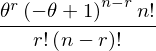

In [29]:
#----------------------Symbolic binomial-------------------------------#
n = sp.Symbol('n', integer=True, positive=True)
r = sp.Symbol('r', integer=True, positive=True)
theta = sp.Symbol('theta')

# Create the function symbolically
from sympy import factorial
cNkSym=  (factorial(n))/ (factorial(r) *factorial(n-r))
cNkSym.evalf() # this works

binomSym= cNkSym*((theta **r)*(1-theta)**(n-r))
binomSym.evalf()
#Convert it to a Numpy-callable function
binomLambda = sp.Lambda((theta,r,n), binomSym) 
#----------------------Symbolic binomial-------------------------------#
maths(r"\operatorname{Bin}(r|n,\theta) = ")
display (binomLambda.expr)

In [14]:
binomLambda(0.5,50,100)

In [15]:
binomSym.subs({theta:0.5,r:5,n:10})

# Prior – The Beta Distribution

Define the Beta distribution (symbolically using sympy) which will act as our prior distribution

<IPython.core.display.Math object>

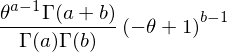

In [17]:
#----------------------Symbolic beta-------------------------------#
a = sp.Symbol('a', integer=False, positive=True)
b = sp.Symbol('b', integer=False, positive=True)
#mu = sp.Symbol('mu', integer=False, positive=True)

# Create the function symbolically
G = sp.gamma
# The normalisation factor
BetaNormSym = G(a + b)/(G(a)*G(b))
# The functional form
BetaFSym = theta**(a-1) * (1-theta)**(b-1)

BetaSym=BetaNormSym * BetaFSym
BetaSym.evalf() # this works
# Turn Beta into a function
BetaLambda = sp.Lambda((theta,a,b), BetaNormSym * BetaFSym)
maths(r"\operatorname{Beta}(\theta|a,b) = ")
display(BetaSym)
#----------------------Symbolic beta-------------------------------#

In [23]:
BetaLambda(0.2,1,2)

In [19]:
BetaSym.subs({theta:0.5,a:2,b:7})

Plot the Beta distribution

Populating the interactive namespace from numpy and matplotlib


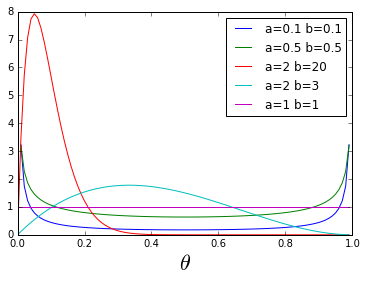

In [24]:
%pylab inline
mus = arange(0,1,.01)

# Plot for various values of a and b
for ab in [(.1,.1),(.5,.5),(2,20),(2,3), (1,1)]:
    plot(mus, vectorize(BetaLambda)(mus,*ab), label="a=%s b=%s" % ab)

legend(loc=0)
xlabel(r"$\theta$", size=22)

# Posterior
We can find the posterior distribution by multiplying our Beta prior by the Binomial likelihood

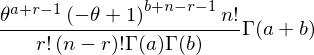

<IPython.core.display.Math object>

In [25]:
#----------------------Symbolic beta-bin-------------------------------#
a = sp.Symbol('a', integer=False, positive=True)
b = sp.Symbol('b', integer=False, positive=True)
BetaBinSym=BetaSym * binomSym
# Turn Beta-bin into a function
BetaBinLambda = sp.Lambda((theta,a,b,n,r), BetaBinSym)

BetaBinSym=BetaBinSym.powsimp()
display(BetaBinSym)
maths(r"\operatorname{Beta}(\theta|a,b) \times \operatorname{Bin}(r|n,\theta) \propto %s" % sp.latex(BetaBinSym))
#----------------------Symbolic beta-bin-------------------------------#

BetaBinSym.subs({theta:0.5,a:2,b:7,n:10,r:3})

In [26]:
BetaBinLambda (0.5,2,7, 10,3)

So the posterior distribution has the same functional dependence on $\theta$ as the prior, it is just another Beta distribution

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

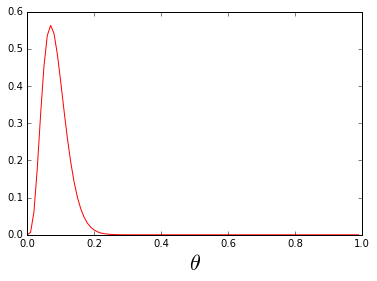

In [27]:
prior = BetaLambda(theta,2,7)
maths("\mathbf{Prior}:\operatorname{Beta}(\theta|a=2,b=7) = %s" % sp.latex(prior))
likelihood = binomLambda(theta,3,50) # = binomLambda(0.5,3,10)
maths("\mathbf{Likelihood}: \operatorname{Bin}(r=3|n=6,\theta) = %s" % sp.latex(likelihood))
posterior = prior * likelihood
posterior=posterior.powsimp()
maths(r"\mathbf{Posterior (normalised)}:\operatorname{Beta}(\theta|2,7) \times \operatorname{Bin}(3|50,\theta)=%s" 
      % sp.latex(posterior))

posterior.subs({theta:0.5})
plt.plot(mus, (sp.lambdify(theta,posterior))(mus), 'r')
xlabel("$\\theta$", size=22)

In [36]:
np.random.seed(124)

nobs = 10
theta = 0.3
Y = np.random.binomial(1, theta, nobs)
Y

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])